# Exploratory Analysis based on movie genre, location and budget.

In [74]:
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = './movie_metadata data research.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)


In [75]:
genreseries=df.groupby('genres')[['imdb_score','budget']].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8 
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)
#print the genres for inspection
top_rated_genre.head()

,imdb_score,budget
genres,,
Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.80,NaN
Action|Adventure|Biography|Drama|History,8.60,NaN
Action|Drama|History|Thriller|War,8.50,"4,400,000.00"
Adventure|Animation|Drama|Family|Musical,8.50,"45,000,000.00"
Crime|Drama|Fantasy|Mystery,8.50,"60,000,000.00"


In [76]:
#set the maximum possible budget to 500 000
max_budget = 500000
topgenreseries=df.groupby('genres')[['imdb_score','budget','gross']].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
budget_genres.head()

,imdb_score,budget,gross
genres,,,
Documentary|Family,8.20,"125,000.00",NaN
Crime|Documentary,8.00,"200,000.00","2,156,472.50"
Documentary|History|Music,7.80,"400,000.00","6,757,592.50"
Biography|Documentary|Music,7.53,"300,000.00","6,531,469.50"
Biography|Documentary,7.30,"25,109.00","592,014.00"


In [77]:
df[df['genres']=='Documentary|Family']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4945,Color,Amal Al-Agroobi,NaN,62.00,58.00,NaN,NaN,NaN,NaN,Documentary|Family,...,NaN,Arabic,United Arab Emirates,NaN,"125,000.00","2,013.00",NaN,8.20,NaN,54


In [78]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


### Top 10 countries with the most movies

In [79]:
movies_per_country = df['country'].value_counts()
m = movies_per_country.head(10)
m

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Japan          23
Name: country, dtype: int64

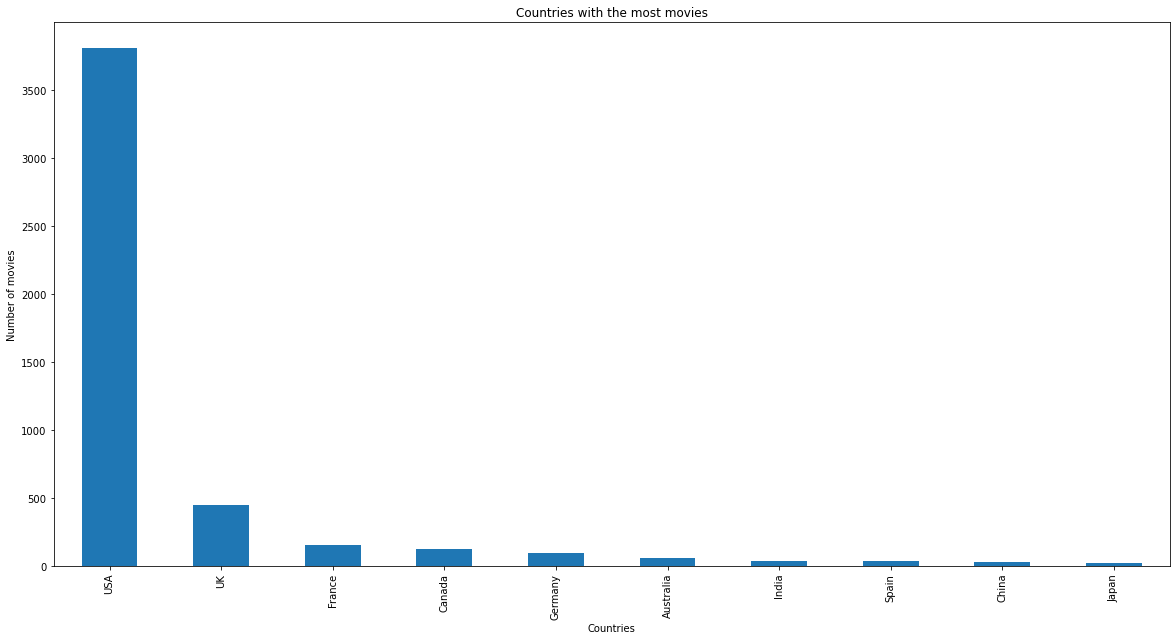

In [80]:
#Analysis of one variable with count 
df['country'].value_counts().nlargest(10).plot(kind='bar', figsize=(20,10))
plt.title("Countries with the most movies")
plt.ylabel('Number of movies')
plt.xlabel('Countries');

### Movies sales per country might be relative to movie reviews and social media likes

In [81]:

movies_per_country = df.groupby('country').sum()[['gross','num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','movie_facebook_likes']]
movies_per_country.sort_values(by = ['gross'], inplace=True, ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
new_df = movies_per_country.head(10)
new_df

,gross,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes
country,,,,,,,
USA,"178,619,254,385.00","541,011.00","3,072,653.00","2,791,139.00","27,778,657.00","7,123,592.00",30270388
UK,"11,808,199,558.00","68,545.00","118,869.00","214,953.00","2,587,546.00","575,244.00",3656451
Germany,"2,462,603,234.00","13,619.00","28,283.00","51,286.00","584,158.00","148,033.00",499922
France,"1,978,421,823.00","20,627.00","48,974.00","68,622.00","656,909.00","146,894.00",758577
Australia,"1,688,648,202.00","7,408.00","10,301.00","15,320.00","242,168.00","85,629.00",595149
Canada,"1,615,108,801.00","11,441.00","17,104.00","29,210.00","295,793.00","54,653.00",330055
New Zealand,"1,298,160,522.00","2,855.00",489.00,"2,883.00","68,335.00","10,746.00",108328
Japan,"570,412,925.00","2,574.00","24,605.00","3,815.00","60,027.00","5,486.00",127189
China,"268,717,774.00","2,996.00","6,900.00","4,058.00","55,945.00","17,068.00",65323


In [82]:
n_df = df.sort_values(by='gross', ascending=False)
n_df = n_df.head(10)
n_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
26,Color,James Cameron,315.00,194.00,0.00,794.00,Kate Winslet,"29,000.00","658,672,302.00",Drama|Romance,...,"2,528.00",English,USA,PG-13,"200,000,000.00","1,997.00","14,000.00",7.70,2.35,26000
29,Color,Colin Trevorrow,644.00,124.00,365.00,"1,000.00",Judy Greer,"3,000.00","652,177,271.00",Action|Adventure|Sci-Fi|Thriller,...,"1,290.00",English,USA,PG-13,"150,000,000.00","2,015.00","2,000.00",7.00,2.00,150000
794,Color,Joss Whedon,703.00,173.00,0.00,"19,000.00",Robert Downey Jr.,"26,000.00","623,279,547.00",Action|Adventure|Sci-Fi,...,"1,722.00",English,USA,PG-13,"220,000,000.00","2,012.00","21,000.00",8.10,1.85,123000
17,Color,Joss Whedon,703.00,173.00,0.00,"19,000.00",Robert Downey Jr.,"26,000.00","623,279,547.00",Action|Adventure|Sci-Fi,...,"1,722.00",English,USA,PG-13,"220,000,000.00","2,012.00","21,000.00",8.10,1.85,123000
66,Color,Christopher Nolan,645.00,152.00,"22,000.00","11,000.00",Heath Ledger,"23,000.00","533,316,061.00",Action|Crime|Drama|Thriller,...,"4,667.00",English,USA,PG-13,"185,000,000.00","2,008.00","13,000.00",9.00,2.35,37000
240,Color,George Lucas,320.00,136.00,0.00,"1,000.00",Liam Neeson,"20,000.00","474,544,677.00",Action|Adventure|Fantasy|Sci-Fi,...,"3,597.00",English,USA,PG,"115,000,000.00","1,999.00","14,000.00",6.50,2.35,13000
3024,Color,George Lucas,282.00,125.00,0.00,504.00,Peter Cushing,"11,000.00","460,935,665.00",Action|Adventure|Fantasy|Sci-Fi,...,"1,470.00",English,USA,PG,"11,000,000.00","1,977.00","1,000.00",8.70,2.35,33000
8,Color,Joss Whedon,635.00,141.00,0.00,"19,000.00",Robert Downey Jr.,"26,000.00","458,991,599.00",Action|Adventure|Sci-Fi,...,"1,117.00",English,USA,PG-13,"250,000,000.00","2,015.00","21,000.00",7.50,2.35,118000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000


### Top 10 movie genres

In [83]:
# topgenreseries=df.groupby('genres')[['imdb_score','budget','s']].mean()

genres = df['genres'].value_counts().nlargest(10)

genres

Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: genres, dtype: int64

Text(0.5, 0, 'Countries')

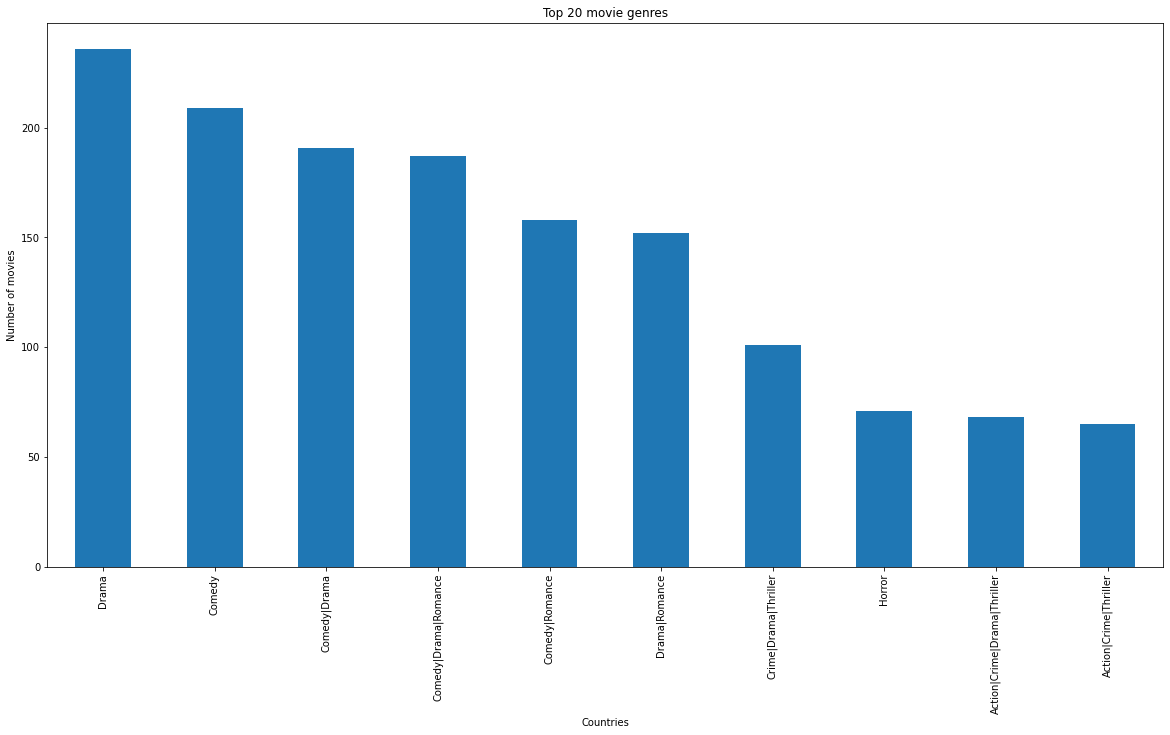

In [93]:
df['genres'].value_counts().nlargest(10).plot(kind='bar', figsize=(20,10))
plt.title("Top 20 movie genres")
plt.ylabel('Number of movies')
plt.xlabel('Countries')

### Genres by country per budget and how much the movies in that particular genre grossed 

In [106]:
df.groupby(['genres','country'])['gross', 'budget'].sum().sort_values(by='gross',ascending=False).head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7412\2797725643.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['genres','country'])['gross', 'budget'].sum().sort_values(by='gross',ascending=False).head(10)


,,gross,budget
genres,country,,
Action|Adventure|Sci-Fi,USA,"9,226,869,171.00","6,995,200,000.00"
Comedy,USA,"6,462,466,687.00","3,172,858,000.00"
Comedy|Romance,USA,"5,968,868,929.00","3,228,151,000.00"
Comedy|Drama|Romance,USA,"4,454,069,399.00","2,878,224,736.00"
Adventure|Animation|Comedy|Family|Fantasy,USA,"3,895,349,816.00","2,400,000,000.00"
Action|Adventure|Fantasy|Sci-Fi,USA,"3,560,217,100.00","1,165,500,000.00"
Comedy|Drama,USA,"3,382,308,035.00","1,968,839,000.00"
Action|Adventure|Fantasy,USA,"3,358,868,404.00","3,039,000,000.00"
Action|Adventure|Sci-Fi|Thriller,USA,"3,331,997,495.00","2,780,800,000.00"


### Top 10  movie directors grossing highest with their various budgets


In [105]:
df.groupby(['director_name','country'])['gross', 'budget'].sum().sort_values(by='gross',ascending=False).head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7412\4060457651.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['director_name','country'])['gross', 'budget'].sum().sort_values(by='gross',ascending=False).head(10)


,,gross,budget
director_name,country,,
Steven Spielberg,USA,"4,014,061,704.00","1,452,900,870.00"
Michael Bay,USA,"2,231,242,537.00","1,587,000,000.00"
Tim Burton,USA,"2,071,275,480.00","1,247,000,000.00"
Sam Raimi,USA,"2,014,600,898.00","1,381,975,000.00"
James Cameron,USA,"1,909,725,910.00","742,000,000.00"
Christopher Nolan,USA,"1,813,227,576.00","1,005,000,000.00"
George Lucas,USA,"1,741,418,480.00","354,777,000.00"
Joss Whedon,USA,"1,730,886,628.00","730,000,000.00"
Robert Zemeckis,USA,"1,619,309,108.00","1,070,000,000.00"
